In [10]:

import pandas as pd

# Lisez le fichier CSV en utilisant le chemin complet
df = pd.read_csv('data\\Data_clean_normalisé.csv', header=0)

# Afficher les données du dataset

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    360 non-null    object 
 1   Mortgage_15yr           360 non-null    float64
 2   Mortgage_30yr           360 non-null    float64
 3   Consumer price index    360 non-null    float64
 4   Gross Domestic Product  360 non-null    float64
 5   Monthly_supply_houses   360 non-null    float64
 6   Personal_income         360 non-null    float64
 7   Population              360 non-null    float64
 8   Total_construction      360 non-null    float64
 9   Unemployment_rate       360 non-null    float64
 10  Home_price_index        360 non-null    float64
dtypes: float64(10), object(1)
memory usage: 31.1+ KB
None


Corrélation

In [11]:
# Calcul de  corrélation de Pearson entre chaque variable et HPI
correlation_with_hpi = df.drop(columns=['DATE']).corrwith(df['Home_price_index'])

# Afficher les résultats
print("Corrélation de chaque variable avec HPI (Home Price Index) :\n")
print(correlation_with_hpi)


Corrélation de chaque variable avec HPI (Home Price Index) :

Mortgage_15yr            -0.699111
Mortgage_30yr            -0.707872
Consumer price index      0.926769
Gross Domestic Product    0.945313
Monthly_supply_houses     0.311259
Personal_income           0.936835
Population                0.885145
Total_construction        0.981200
Unemployment_rate        -0.086740
Home_price_index          1.000000
dtype: float64


In [12]:
# Supprimer les colonnes "Monthly Supply of Houses" et "Unemployment Rate"
df.drop(columns=['Monthly_supply_houses', 'Unemployment_rate'], inplace=True)

# Afficher les informations sur le DataFrame mis à jour
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    360 non-null    object 
 1   Mortgage_15yr           360 non-null    float64
 2   Mortgage_30yr           360 non-null    float64
 3   Consumer price index    360 non-null    float64
 4   Gross Domestic Product  360 non-null    float64
 5   Personal_income         360 non-null    float64
 6   Population              360 non-null    float64
 7   Total_construction      360 non-null    float64
 8   Home_price_index        360 non-null    float64
dtypes: float64(8), object(1)
memory usage: 25.4+ KB
None


Matrice de corrélation entre les variables explicatives deux à deux :

                        Mortgage_15yr  Mortgage_30yr  Consumer price index  \
Mortgage_15yr                1.000000       0.997299             -0.857323   
Mortgage_30yr                0.997299       1.000000             -0.858012   
Consumer price index        -0.857323      -0.858012              1.000000   
Gross Domestic Product      -0.836397      -0.838982              0.993623   
Personal_income             -0.838519      -0.842739              0.986739   
Population                  -0.897600      -0.901244              0.983963   
Total_construction          -0.644053      -0.657649              0.887990   

                        Gross Domestic Product  Personal_income  Population  \
Mortgage_15yr                        -0.836397        -0.838519   -0.897600   
Mortgage_30yr                        -0.838982        -0.842739   -0.901244   
Consumer price index                  0.993623         0.986739    

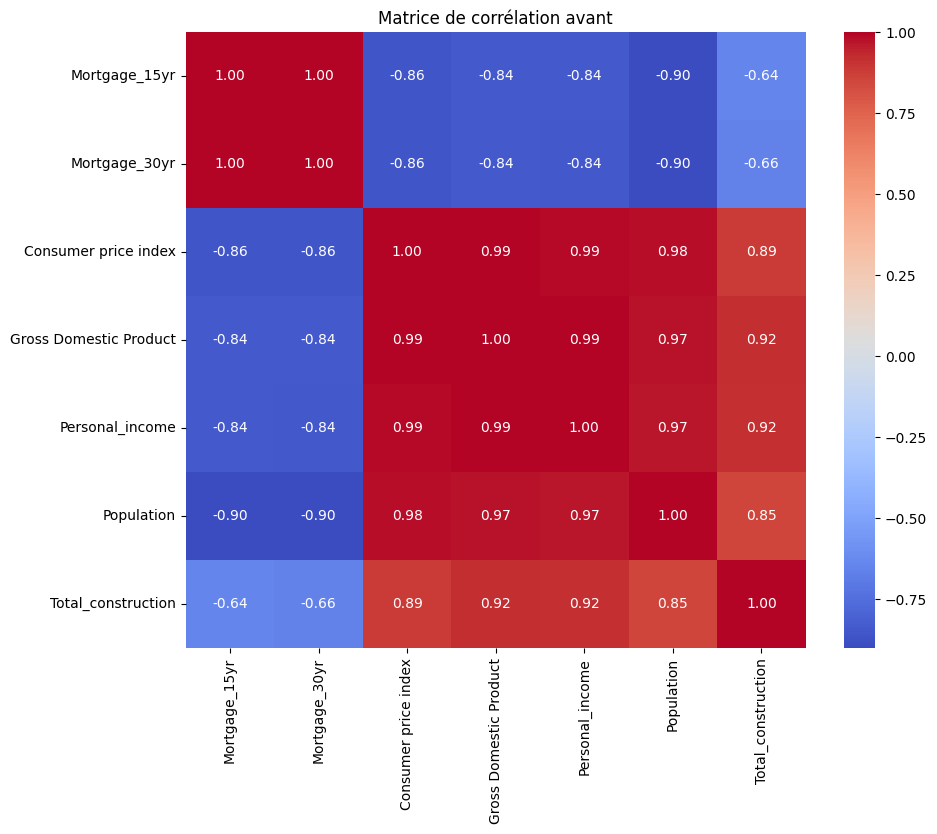

In [13]:
# Calculer la matrice de corrélation entre les variables explicatives deux à deux
correlation_matrix_avant = df.drop(columns=['DATE', 'Home_price_index']).corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation entre les variables explicatives deux à deux :\n")
print(correlation_matrix_avant)
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation entre les variables explicatives deux à deux
correlation_matrix_avant = df.drop(columns=['DATE', 'Home_price_index']).corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation entre les variables explicatives deux à deux :\n")
print(correlation_matrix_avant)

# Tracer la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_avant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation avant')
plt.show()



In [14]:
# Combinaison de Consumer Price Index et Gross Domestic Product
df['Economic_growth'] = df['Consumer price index'] * df['Gross Domestic Product']


# Combinaison de Consumer Price Index et Total Construction
df['Construction_inflation'] = df['Consumer price index'] * df['Total_construction']

# Indice de densité de richesse
df['Wealth_density_index'] = df['Population'] * df['Personal_income']

# Suppression des colonnes originales avec corrélation élevée
df.drop(columns=['Mortgage_30yr', 'Consumer price index', 'Population', 'Personal_income','Total_construction'], inplace=True)




# Afficher les informations sur le DataFrame mis à jour
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    360 non-null    object 
 1   Mortgage_15yr           360 non-null    float64
 2   Gross Domestic Product  360 non-null    float64
 3   Home_price_index        360 non-null    float64
 4   Economic_growth         360 non-null    float64
 5   Construction_inflation  360 non-null    float64
 6   Wealth_density_index    360 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.8+ KB
None


Matrice de corrélation entre les variables explicatives deux à deux :

                        Mortgage_15yr  Gross Domestic Product  \
Mortgage_15yr                1.000000               -0.836397   
Gross Domestic Product      -0.836397                1.000000   
Economic_growth             -0.599178                0.880462   
Construction_inflation      -0.405544                0.769519   
Wealth_density_index        -0.670522                0.895230   

                        Economic_growth  Construction_inflation  \
Mortgage_15yr                 -0.599178               -0.405544   
Gross Domestic Product         0.880462                0.769519   
Economic_growth                1.000000                0.943785   
Construction_inflation         0.943785                1.000000   
Wealth_density_index           0.976894                0.904931   

                        Wealth_density_index  
Mortgage_15yr                      -0.670522  
Gross Domestic Product              0.895

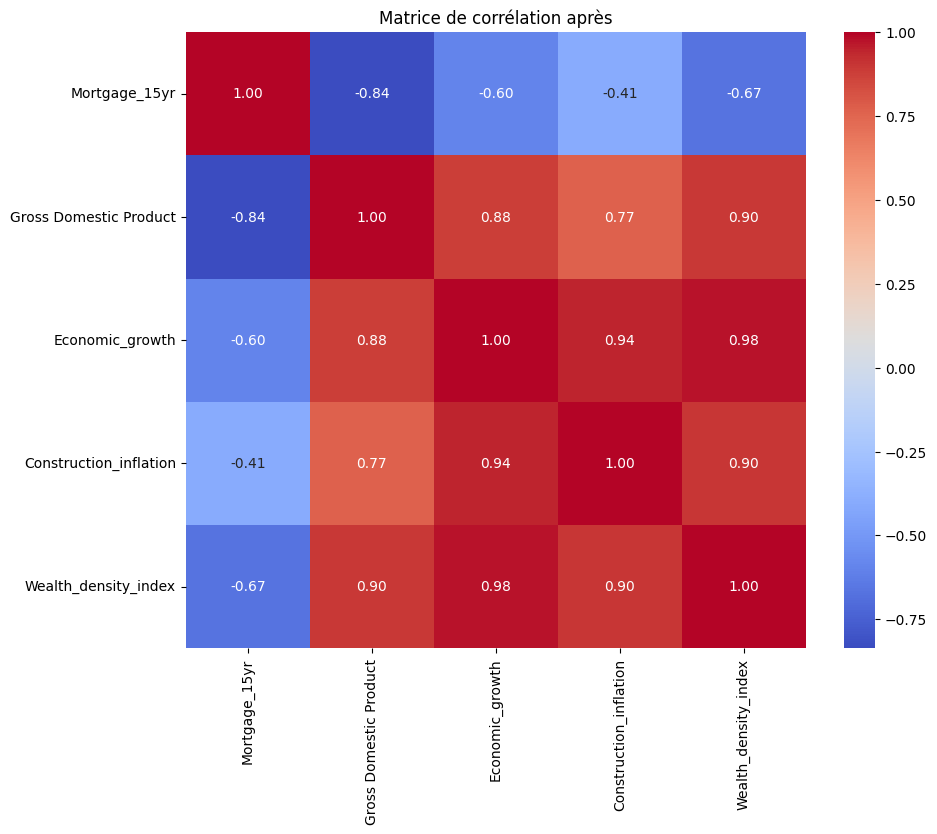

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation entre les variables explicatives deux à deux
correlation_matrix_apres = df.drop(columns=['DATE', 'Home_price_index']).corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation entre les variables explicatives deux à deux :\n")
print(correlation_matrix_apres)

# Tracer la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_apres, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation après')
plt.show()



In [16]:
# Calcul de  corrélation de Pearson entre chaque variable et HPI
correlation_with_hpi = df.drop(columns=['DATE']).corrwith(df['Home_price_index'])

# Afficher les résultats
print("Corrélation de chaque variable avec HPI (Home Price Index) :\n")
print(correlation_with_hpi)


Corrélation de chaque variable avec HPI (Home Price Index) :

Mortgage_15yr            -0.699111
Gross Domestic Product    0.945313
Home_price_index          1.000000
Economic_growth           0.862347
Construction_inflation    0.849479
Wealth_density_index      0.852343
dtype: float64


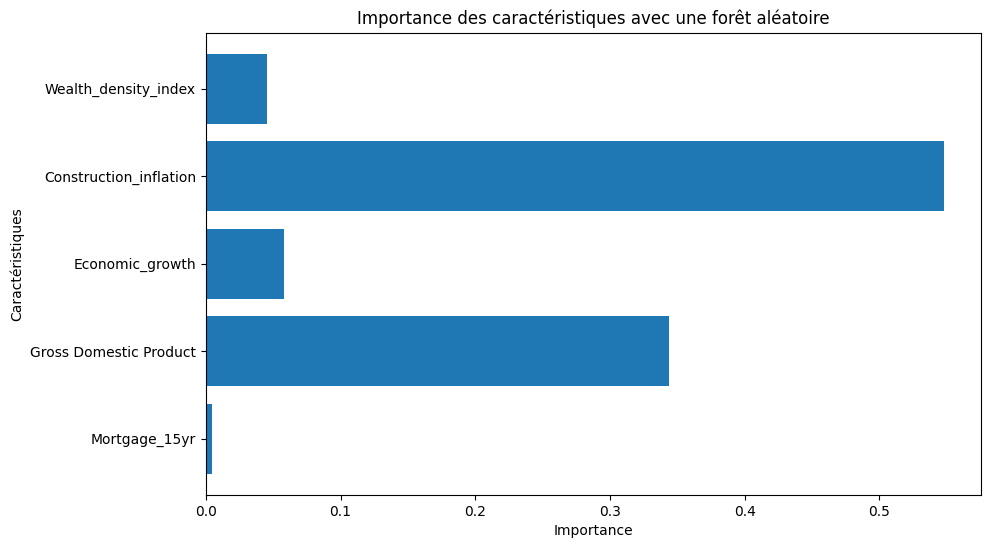

In [17]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Supprimer la colonne 'DATE' du DataFrame
X = df.drop(['Home_price_index', 'DATE'], axis=1)
y = df['Home_price_index']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de forêt aléatoire
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Extraire l'importance des caractéristiques
feature_importances = forest.feature_importances_

# Afficher l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.title('Importance des caractéristiques avec une forêt aléatoire')
plt.show()


In [18]:
from sklearn.feature_selection import SelectKBest, f_regression

# 1. Séparation des données
X = df.drop(['Home_price_index', 'DATE'], axis=1)  # Variables explicatives
y = df['Home_price_index']  # Variable cible

# 2. Utilisation de SelectKBest pour sélectionner les meilleures caractéristiques
k = 5  # Nombre de caractéristiques à sélectionner
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Récupérer les indices des caractéristiques sélectionnées
selected_features_indices = selector.get_support(indices=True)

# Récupérer les noms des caractéristiques sélectionnées
selected_features = X.columns[selected_features_indices]

# Afficher les caractéristiques sélectionnées
print("Caractéristiques sélectionnées:", selected_features)

# Afficher les p-values des caractéristiques sélectionnées
print("P-values:", selector.pvalues_)

Caractéristiques_sélectionnées= ['Gross Domestic Product', 'Total_construction', 'Economic_growth','Wealth_density_index', 'Income_to_Home_price_ratio']

print(df.info())
df.to_csv('data\\Data_avecfeatures.csv', index=False)

Caractéristiques sélectionnées: Index(['Mortgage_15yr', 'Gross Domestic Product', 'Economic_growth',
       'Construction_inflation', 'Wealth_density_index'],
      dtype='object')
P-values: [4.20054876e-054 2.88123650e-176 7.44959244e-108 1.93464249e-101
 8.17305770e-103]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    360 non-null    object 
 1   Mortgage_15yr           360 non-null    float64
 2   Gross Domestic Product  360 non-null    float64
 3   Home_price_index        360 non-null    float64
 4   Economic_growth         360 non-null    float64
 5   Construction_inflation  360 non-null    float64
 6   Wealth_density_index    360 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.8+ KB
None
